In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter

# 1. Construct networks
Now get information of London Tube
 

In [2]:
G=nx.read_graphml('data/london.graphml')

In [3]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 401
Number of edges: 467
Average degree:   2.3292


In [4]:
# check attributes
list(G.nodes(data = True))[0]


('Liverpool Street', {'coords': '(533125.9616962055, 181621.10750174103)'})

In [5]:
# add station name as an attributes of nodes
for node in G.nodes():
    G.nodes[node]['station_name']=node

In [6]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [7]:
# To check edges attributes:
list(G.edges(data = True))[0]

('Liverpool Street',
 'Stratford',
 {'length': 6698.344174470289, 'line_name': 'TfL Rail', 'flows': 162608})

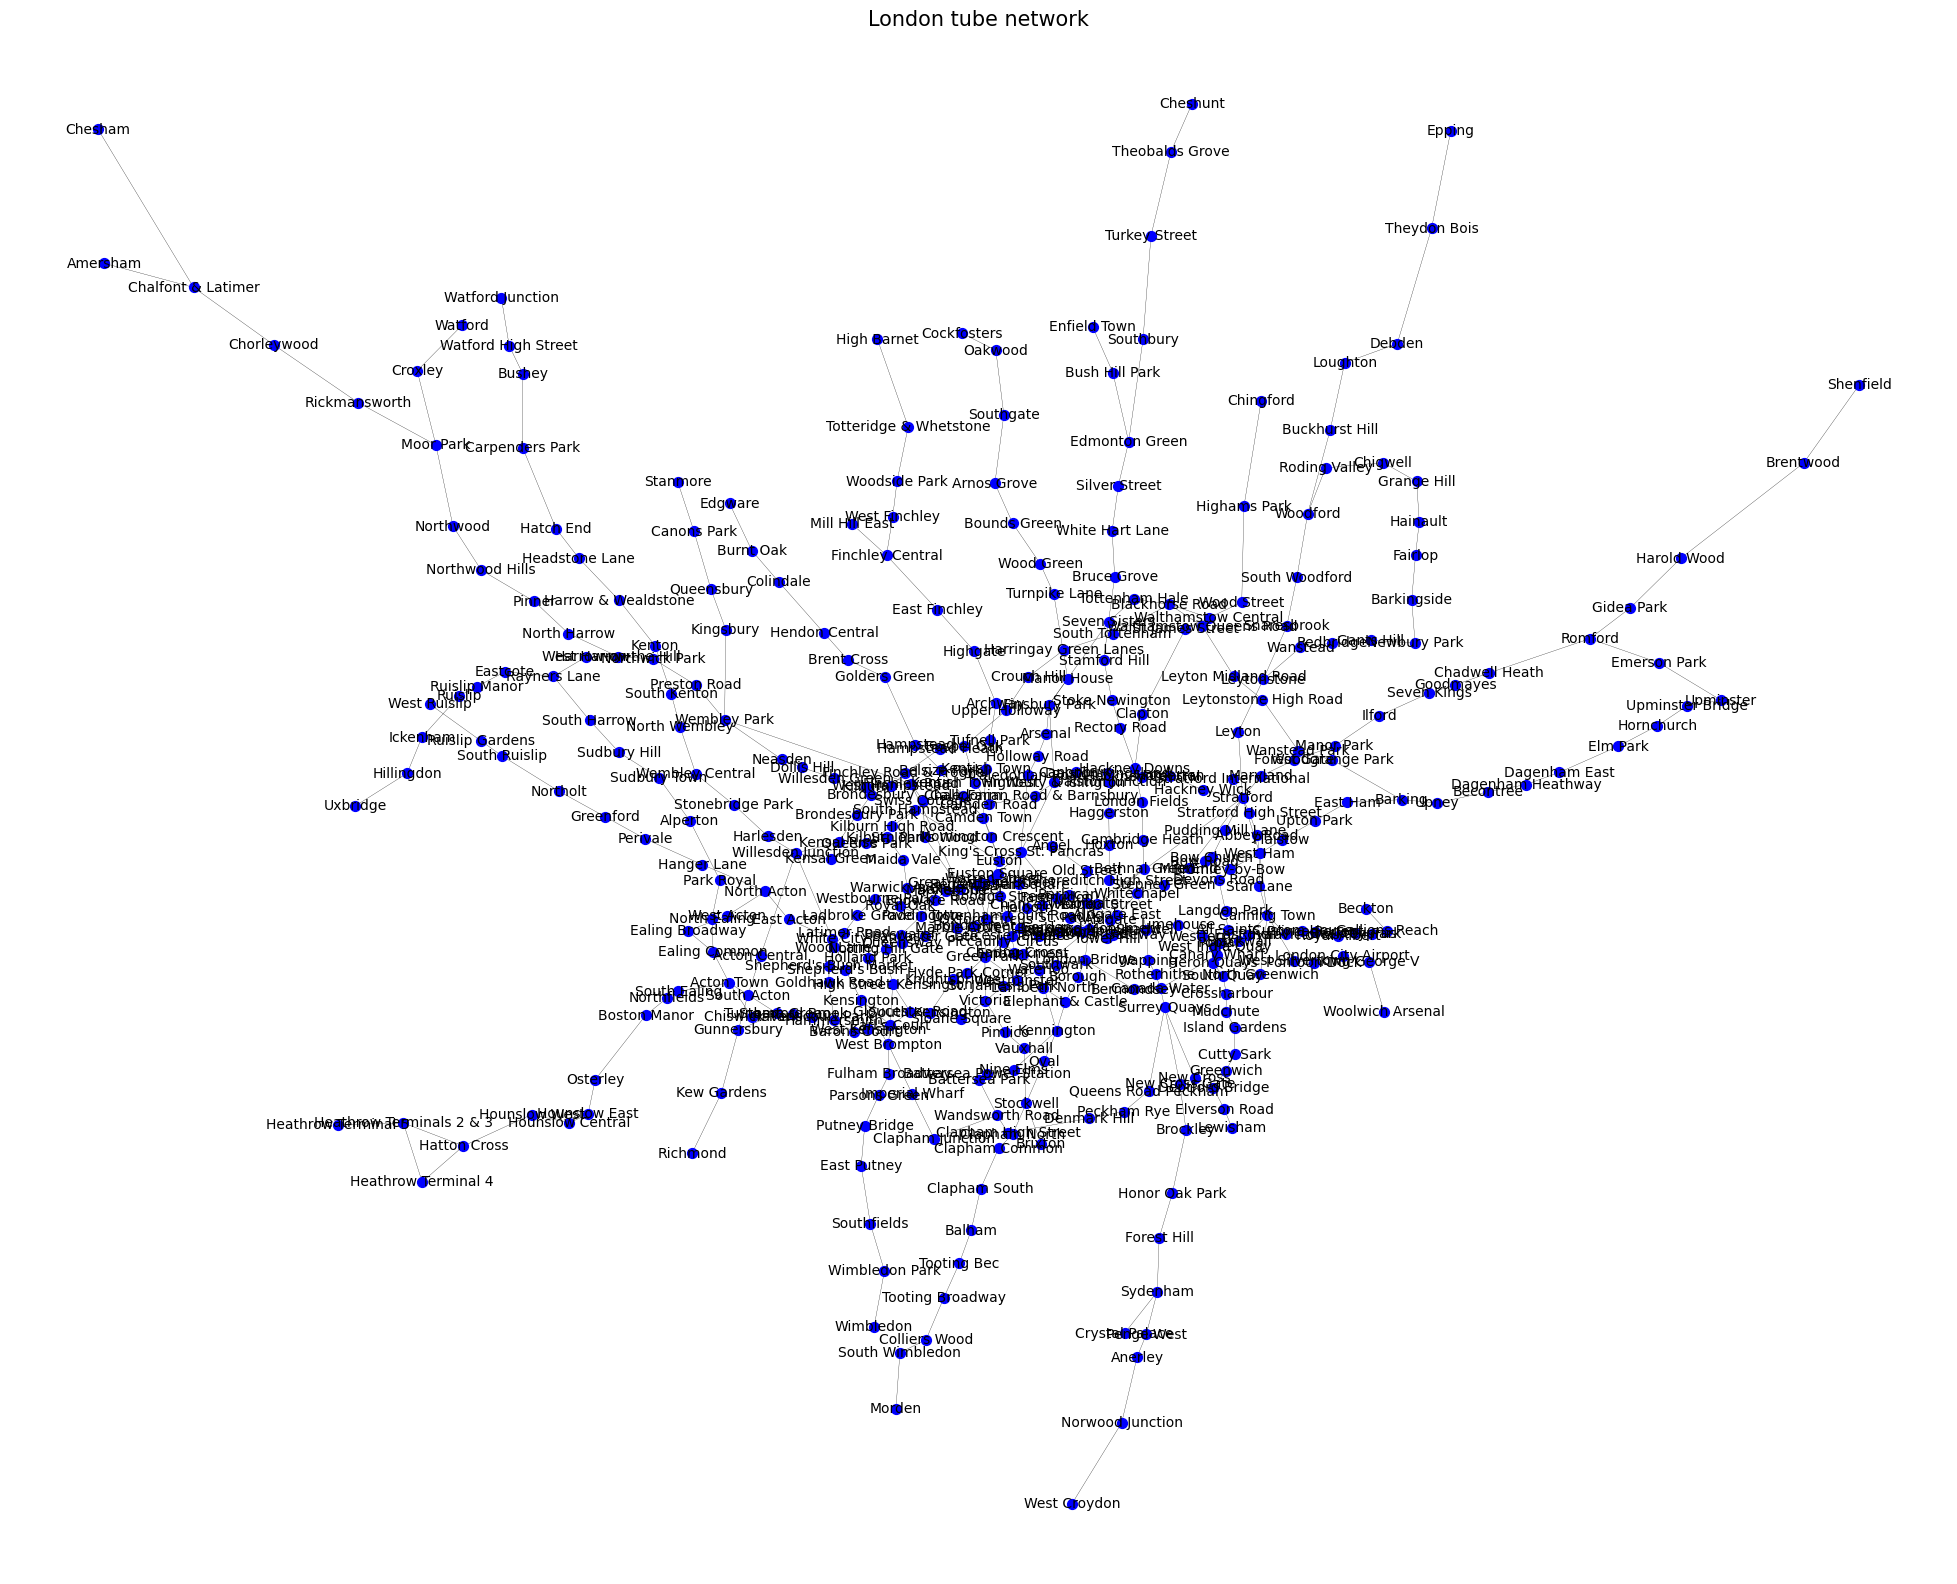

In [8]:
# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

node_labels = nx.get_node_attributes(G, 'station_name')
pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G,pos, node_labels, font_size=10, font_color='black')

plt.title("London tube network",fontsize=15)
plt.axis("off")
plt.show()

In [9]:
 #We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G)
df[0:10]

,source,target,line_name,flows,length
0,Liverpool Street,Stratford,TfL Rail,162608,6698.344174
1,Liverpool Street,Bank and Monument,Central,165732,841.490882
2,Liverpool Street,Bethnal Green,London Overground,32045,2408.253115
3,Liverpool Street,Aldgate East,Hammersmith & City,19711,965.846291
4,Liverpool Street,Moorgate,Circle,46979,434.080019
5,Liverpool Street,Aldgate,Circle,10660,722.068754
6,Stratford,Maryland,TfL Rail,34442,951.317256
7,Stratford,Mile End,Central,6323,2804.953406
8,Stratford,Leyton,Central,56082,2131.339398
9,Stratford,Hackney Wick,London Overground,9891,1572.918886


# 2. Exploring the network

In [10]:
# the maximum distance between stations
max_dist=max({weight for e1, e2, weight in G.edges(data='length')})
max_dist
#This distance in given in meters

7266.258259329394

In [11]:
#if want to know the edge connecting the stations farther away from each other
max(dict(G.edges).items(), key=lambda x: x[1]['length'])

(('Wembley Park', 'Finchley Road'),
 {'length': 7266.258259329394, 'line_name': 'Metropolitan', 'flows': 55187})

In [12]:
#if want to know the name of stations which are further away from each other
furthest_stat = [(u,v) for  u,v,d in G.edges(data=True) if d['length'] == max_dist]
furthest_stat

[('Wembley Park', 'Finchley Road')]

In [13]:
# find out which stations Baker Street is connected to 
Baker_Street = [(u,v) for  u,v,d in G.edges(data=True) if "Baker" in u or "Baker" in v]
Baker_Street

[('Bond Street', 'Baker Street'),
 ('Baker Street', 'Great Portland Street'),
 ('Baker Street', 'Edgware Road'),
 ('Baker Street', 'Finchley Road'),
 ('Baker Street', 'Marylebone'),
 ('Baker Street', "Regent's Park"),
 ('Baker Street', "St. John's Wood")]

In [15]:
#to know the edges connecting Baker Street station:
Baker = [(u,v,d) for  u,v,d in G.edges(data=True) if "Baker" in u or "Baker" in v]
Baker

[('Bond Street',
  'Baker Street',
  {'length': 1744.2410985844656, 'line_name': 'Jubilee', 'flows': 94387}),
 ('Baker Street',
  'Great Portland Street',
  {'length': 826.804115735628, 'line_name': 'Circle', 'flows': 52904}),
 ('Baker Street',
  'Edgware Road',
  {'length': 1034.8188573898747, 'line_name': 'Circle', 'flows': 64055}),
 ('Baker Street',
  'Finchley Road',
  {'length': 3534.5850811439022, 'line_name': 'Metropolitan', 'flows': 75045}),
 ('Baker Street',
  'Marylebone',
  {'length': 538.2893313316822, 'line_name': 'Bakerloo', 'flows': 9148}),
 ('Baker Street',
  "Regent's Park",
  {'length': 795.5240759785881, 'line_name': 'Bakerloo', 'flows': 13949}),
 ('Baker Street',
  "St. John's Wood",
  {'length': 2138.8978127719447, 'line_name': 'Jubilee', 'flows': 10259})]

In [16]:
# diameter of the network
nx.diameter(G)

36

In [17]:
# diameter of the network considering the distance between stations (weighted diameter)

nlen = {n:nx.single_source_dijkstra_path_length(G, n, weight='length') for n in G.nodes() }
e = nx.eccentricity(G,sp=nlen)
d = nx.diameter(G, e)
d

78580.60076776212

# Investigate resilience of London tube network


## Part1 Topological networks
### Centrality measures:
Select 3 centrality measures to characterise nodes:
Identify the most important nodes in London tube network.


### 3.1 Degree Centrality on nodes:

In [50]:
#  Calculate the degree centrality using networkx function:
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree_centrality')


In [51]:
# to dataframe using the nodes as index
df = pd.DataFrame(index=G.nodes())

# df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['degree_centrality'] = pd.Series(nx.get_node_attributes(G, 'degree_centrality'))

df_sorted = df.sort_values(["degree_centrality"], ascending=False)
df_sorted[0:10]

,degree_centrality
Stratford,0.0225
Bank and Monument,0.0200
Baker Street,0.0175
King's Cross St. Pancras,0.0175
Liverpool Street,0.0150
Earl's Court,0.0150
West Ham,0.0150
Oxford Circus,0.0150
Green Park,0.0150
Canning Town,0.0150


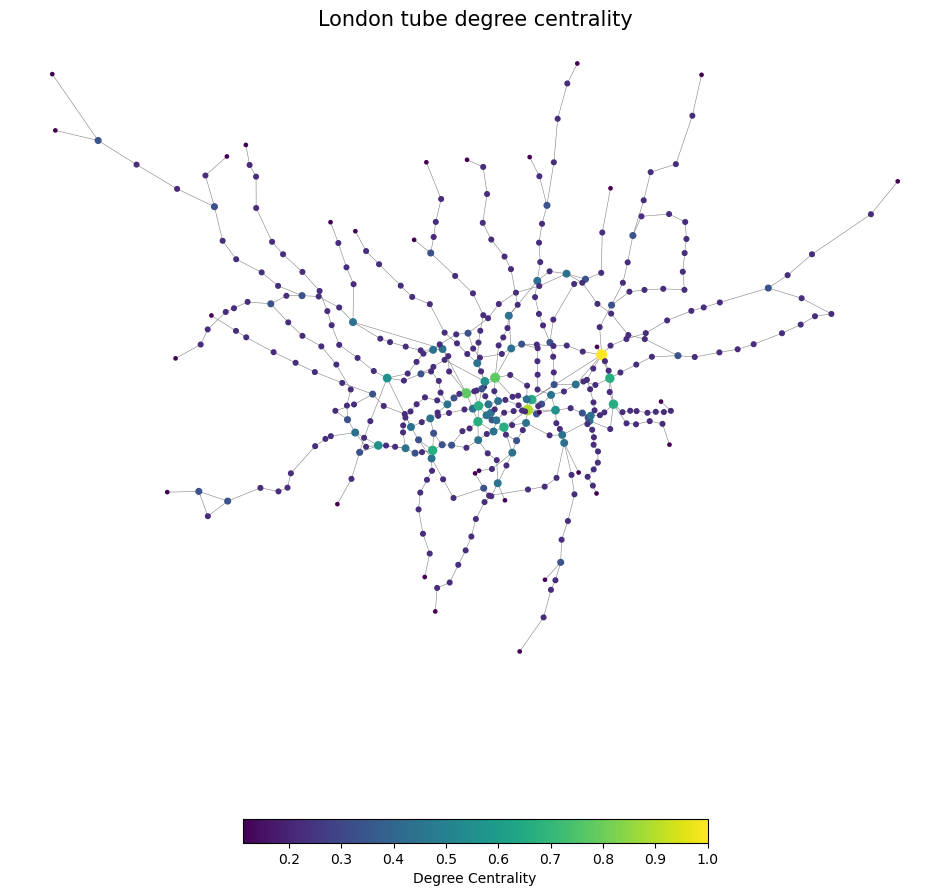

In [52]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['degree_centrality']) for i in G.nodes(data=True)]

deg_color=[(i[1]['degree_centrality']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['degree_centrality']/(max(degree_values)))*50 for i in G.nodes(data=True)]


# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube degree centrality",fontsize=15)
plt.show()

### 3.2 Betweeness Centrality on nodes
Definition

Equations

Combine the context, explain why this will allow me to find out the most crutial station

In [46]:
### Weighted betweenness centrality:
#Compute the betweenness centrality for the network, considering the distance between stations:

bet_london_w=nx.betweenness_centrality(G,weight='length',normalized=True)

# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_w,'betweenness_w')

In [47]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w'))

df_sorted = df.sort_values(["betweenness_w"], ascending=False)
df_sorted[0:10]

,betweenness_w
Bank and Monument,0.221241
King's Cross St. Pancras,0.210213
Stratford,0.182306
Baker Street,0.164173
Oxford Circus,0.157694
Euston,0.155877
Earl's Court,0.143546
Shadwell,0.139449
Waterloo,0.129987
South Kensington,0.129135


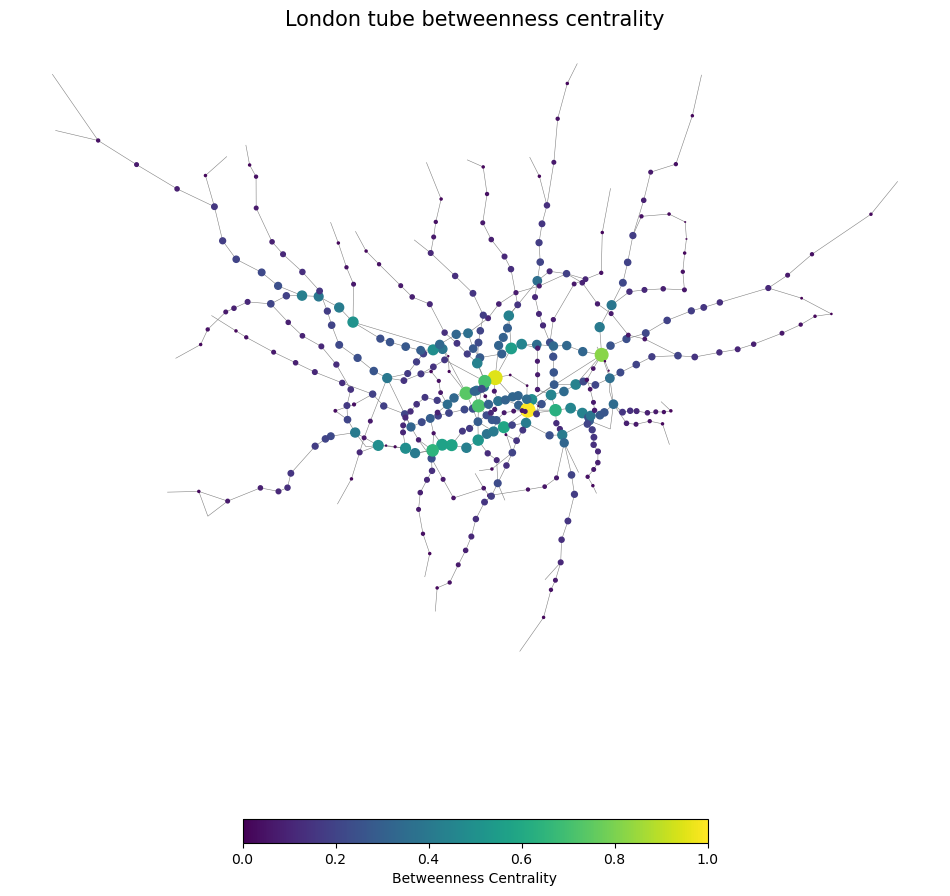

In [29]:
# Lets set colour and size of nodes according to betweenness values
betweenness_w_values=[(i[1]['betweenness_w']) for i in G.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_w']/max(betweenness_w_values)) for i in G.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_w']/max(betweenness_w_values))*100 for i in G.nodes(data=True)]


# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube betweenness centrality",fontsize=15)
plt.show()

### 3.3 Topological betweenness centrality

In [53]:
### Topological betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(G, normalized=True)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
# df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,betweenness_t
Stratford,0.297846
Bank and Monument,0.290489
Liverpool Street,0.270807
King's Cross St. Pancras,0.255307
Waterloo,0.243921
Green Park,0.215835
Euston,0.208324
Westminster,0.203335
Baker Street,0.191568
Finchley Road,0.165085


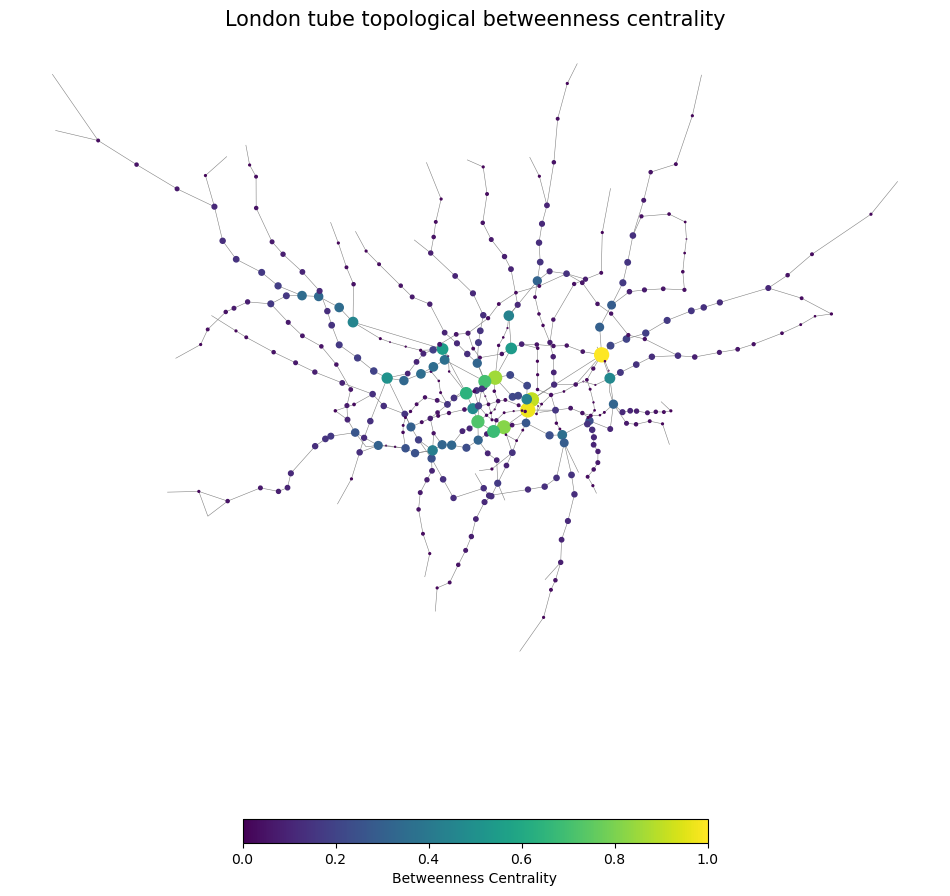

In [31]:
# Lets set colour and size of nodes according to betweenness values
betweenness_t_values=[(i[1]['betweenness_t']) for i in G.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(betweenness_t_values)) for i in G.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(betweenness_t_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological betweenness centrality",fontsize=15)
plt.show()

#### Betweenness centrality on the edges


In [32]:
#Let us compute the betweenness centrality for the network, but this time lets do it in the edges!
bet_london_e=nx.edge_betweenness_centrality(G, normalized=False, weight='length')
# We can add these values to the edges attributes:
nx.set_edge_attributes(G,bet_london_e,'betweenness_e')

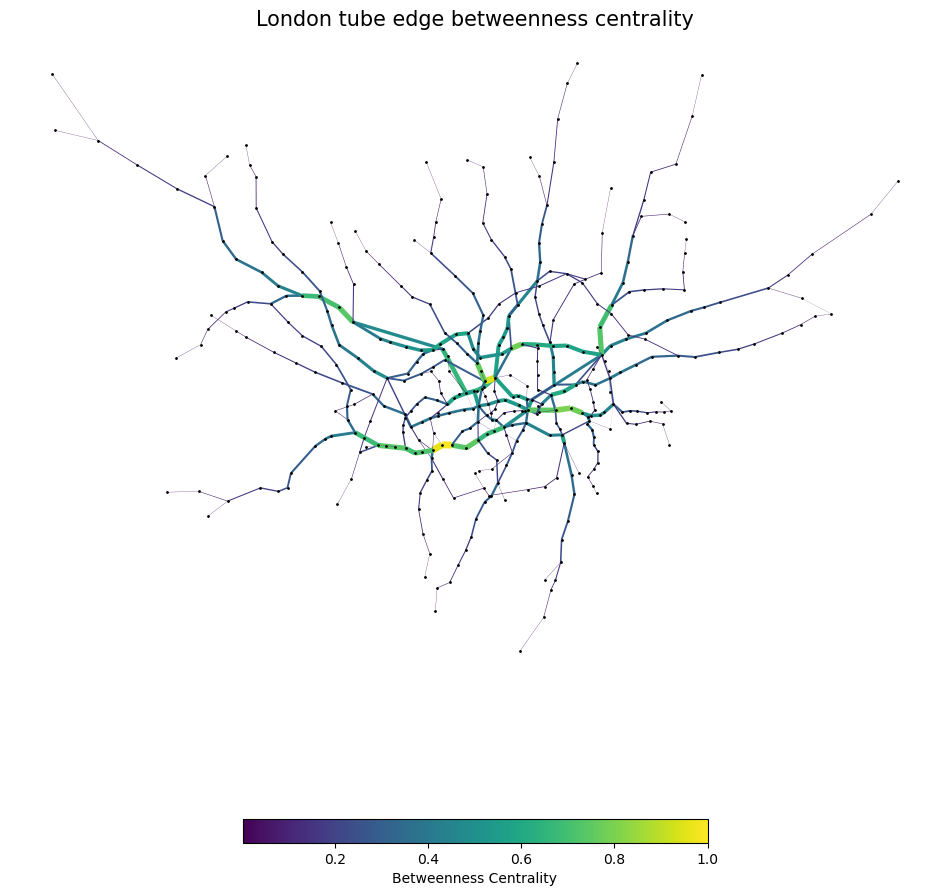

In [33]:
# Lets set color and width of edges according to betweenness values
betweenness_e_values=[(i[2]['betweenness_e']) for i in G.edges(data=True)]

bet_e_color=[(i[2]['betweenness_e']/max(betweenness_e_values)) for i in G.edges(data=True)]
bet_e_width=[(i[2]['betweenness_e']/max(betweenness_e_values)*5) for i in G.edges(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

#pos=nx.spring_layout(X)
edg=nx.draw_networkx_edges(G, pos,edge_color=bet_e_color, width=bet_e_width)

nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= 'black',
        node_size= 1)

plt.colorbar(edg,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube edge betweenness centrality",fontsize=15)
plt.show()

### 3.3 Closeness Centrality

In [38]:
#### Closeness centrality
#Weighted closeness centrality: 
clos_w=nx.closeness_centrality(G, distance='length')
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_w,'closeness_w')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness_w'] = pd.Series(nx.get_node_attributes(G, 'closeness_w'))

df_sorted = df.sort_values(["closeness_w"], ascending=False)
df_sorted[0:10]

,closeness_w
Holborn,0.000079
King's Cross St. Pancras,0.000079
Tottenham Court Road,0.000079
Oxford Circus,0.000079
Leicester Square,0.000078
Piccadilly Circus,0.000078
Charing Cross,0.000078
Chancery Lane,0.000078
Covent Garden,0.000078
Embankment,0.000078


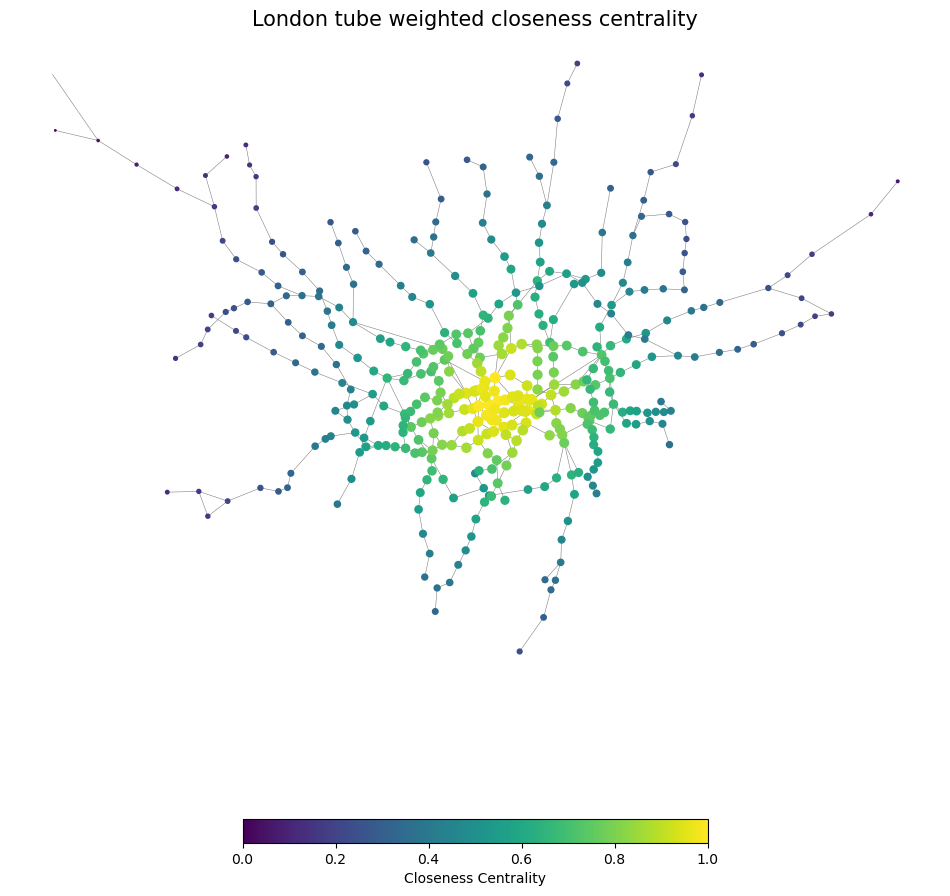

In [36]:
# Lets set color and width of nodes according to the closeness values

clos_w_val=[(i[1]['closeness_w']) for i in G.nodes(data=True)]

closs_w_color=[(i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val)) for i in G.nodes(data=True)]
closs_w_size=[((i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val))*50) for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_w_color,
        node_size= closs_w_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube weighted closeness centrality",fontsize=15)
plt.show()

### Topological closeness centrality


In [39]:
#topological closeness centrality
clos_t=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

,closeness_t
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
Oxford Circus,0.111204
Bond Street,0.110988
Farringdon,0.110742
Angel,0.110742
Moorgate,0.110314


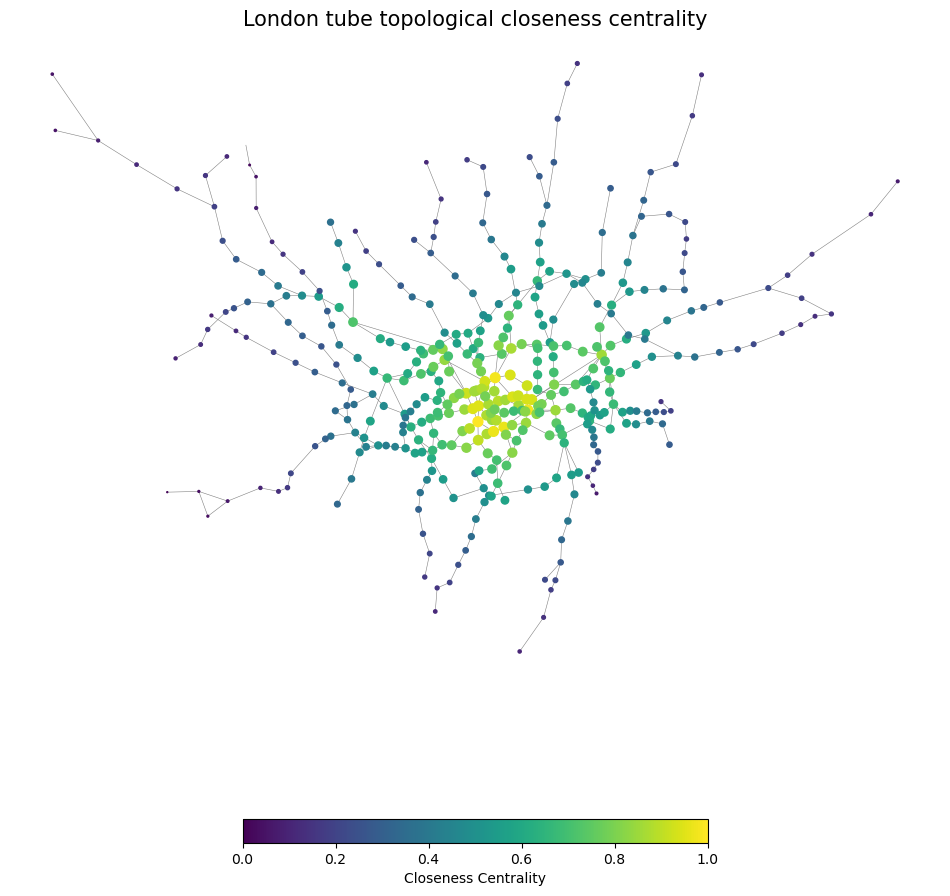

In [40]:
# Lets set color and width of nodes according to the closeness values
clos_t_val=[(i[1]['closeness_t']) for i in G.nodes(data=True)]

closs_t_color=[(i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val)) for i in G.nodes(data=True)]
closs_t_size=[((i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val))*50) for i in G.nodes(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_t_color,
        node_size= closs_t_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological closeness centrality",fontsize=15)
plt.show()

### Eigenvector centrality
(Networkx tutorial)[https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html#networkx.algorithms.centrality.eigenvector_centrality]
`eigenvector_centrality(G, max_iter=100, tol=1e-06, nstart=None, weight=None)`

## Impact measures


## Node removal

In [58]:
G2=G.copy()

###  A Non-sequential removal:
 using your table in 1.- remove 1 node at a time following the rank in the table, i.e. from the most important one to the 10th most important one. 
 
 After each removal, evaluate the impact of the removal using your two measures in 2.-, and proceed until you have removed at least 10 nodes.  

In [55]:
#To remove 10 nodes following the rank of table
# List of nodes:
values_sorted = sorted(bet_london_t.items(), key=itemgetter(1), reverse=True)
bet_t10=[e for e,v in values_sorted[:10]]
bet_t10

['Stratford',
 'Bank and Monument',
 'Liverpool Street',
 "King's Cross St. Pancras",
 'Waterloo',
 'Green Park',
 'Euston',
 'Westminster',
 'Baker Street',
 'Finchley Road']

In [67]:
G_bet=G.copy()
for i in range(len(bet_t10)):
    # remove 1 node    
    G_bet.remove_node(bet_t10[i])
    print(f'{bet_t10[i]} was removed.')
    #Evalutae the impact
    #print(f'The network is connected:{nx.is_connected(G_bet)}')    
    # Compute the size of each component
    Subg = [G_bet.subgraph(c).copy() for c in nx.connected_components(G_bet)]
    print(f'The number of connceted components:\n{nx.number_connected_components(G_bet)}with size of each component {[len(subgraph.nodes) for subgraph in Subg]}')
    ## To obtain the largest component as a new graph: 

    # Get the list of components:
    components = nx.connected_components(G_bet)
    # Use the max() command to find the largest one:
    largest_component = max(components, key=len)
    # Create a "subgraph" of the largest component
    Largest_subgraph = G_bet.subgraph(largest_component)
    print(f'the size of the largest component: {Largest_subgraph.number_of_nodes()} the diameter of the largest subgraph: {nx.diameter(Largest_subgraph)}')
    print('=================================')
    
    

Stratford was removed.
The number of connceted components:
3with size of each component [379, 20, 1]
the size of the largest component: 379 the diameter of the largest subgraph: 49
Bank and Monument was removed.
The number of connceted components:
3with size of each component [378, 20, 1]
the size of the largest component: 378 the diameter of the largest subgraph: 49
Liverpool Street was removed.
The number of connceted components:
3with size of each component [377, 20, 1]
the size of the largest component: 377 the diameter of the largest subgraph: 49
King's Cross St. Pancras was removed.
The number of connceted components:
4with size of each component [371, 20, 5, 1]
the size of the largest component: 371 the diameter of the largest subgraph: 49
Waterloo was removed.
The number of connceted components:
4with size of each component [370, 20, 5, 1]
the size of the largest component: 370 the diameter of the largest subgraph: 49
Green Park was removed.
The number of connceted components:


### Global measures for the whole network 
Specific to London tube network or to others as well


## Degree of network
1. `nx.degree(G)`  counting the number of links going in and out a node, where self-loops counts as 2.
2. If consider the weight of a link into the degree, node strength will be included:
`deg=nx.degree(G, weight="weight")`


##  diameter
1. Topological diameter without weights:`nx.diameter(G)`
2. ` nlen={}
for n in g4.nodes():
    a=nx.single_source_dijkstra_path_length(g4, n)
    print(a)
    nlen[n]=a
e = nx.eccentricity(g4,sp=nlen)
d = nx.diameter(g4, e)`
3. diameter of directed network if some of nodes are unreachable
    `d1=nx.diameter(g5.to_undirected())`

### Eigenvector centrality
https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html